In [1]:
import psycopg2 as pg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import re
import networkx as nx
from collections import Counter, defaultdict
from __future__ import division
import community
import matplotlib.pyplot as plt
%matplotlib inline

In [268]:
# Connect to psql database
conn = pg2.connect(dbname='lastfm', user='evansadler', host='/tmp')
c = conn.cursor()

In [504]:
query = 'select * from pairs2 WHERE count Between 100 and 1000;'
df = pd.read_sql_query(query, conn)


In [476]:
df.min()

count         100
artist1    *nsync
artist2       !!!
dtype: object

In [477]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
count,39121,201.604177,131.460912,100,120,154,227,999


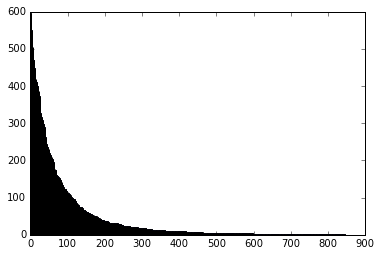

In [480]:
y = df['count'].value_counts()
x = np.arange(0,len(y))
plt.bar(x,y)
#plt.xlim((0,200))
plt.show()

In [271]:
df['count'] = pd.qcut(df['count'], 5,labels=[5,4,3,2,1])

In [539]:
df['count'] = df['count'].max() + 1 - df['count']

In [272]:
df = df.ix[df['count'] > 300,:]

In [537]:
df = df.ix[(~df['artist1'].isin(df_dc.sort(0, ascending = False).index[:200])) & (~df['artist2'].isin(df_dc.sort(0, ascending = False).index[:200])),:]

In [540]:
subset = df[['artist1', 'artist2','count']]
tuples = [tuple(x) for x in subset.values]
G=nx.Graph()
G.add_weighted_edges_from(tuples)

In [498]:
subset = df[['artist1', 'artist2']]
tuples = [tuple(x) for x in subset.values]
G=nx.Graph()
G.add_edges_from(tuples)

In [507]:
part = community.best_partition(G)
values = [part.get(node) for node in G.nodes()]

In [508]:
community.modularity(part, G)

0.6940208393668588

In [544]:
new_dict = defaultdict(list)
for k, v in part.iteritems():
    new_dict[v].append(k)

In [545]:
new_dict.keys()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [546]:
new_dict

defaultdict(list,
            {0: ['sara bareilles',
              'matt nathanson',
              'leona lewis',
              'brett dennen',
              'michael bubl',
              'the hush sound',
              'david gray',
              '311',
              'sheryl crow',
              'rachael yamagata',
              "jack's mannequin",
              'onerepublic',
              'jordin sparks',
              'augustana',
              'colbie caillat',
              'corinne bailey rae',
              'dispatch',
              'ok go',
              'kate nash',
              'guster',
              'ben harper',
              'o.a.r.',
              'sia',
              'hot hot heat',
              'gavin degraw',
              'natasha bedingfield',
              'ben folds five',
              'ben kweller',
              'joshua radin',
              'dido',
              'the pussycat dolls',
              'ray lamontagne',
              'danity kane',
             

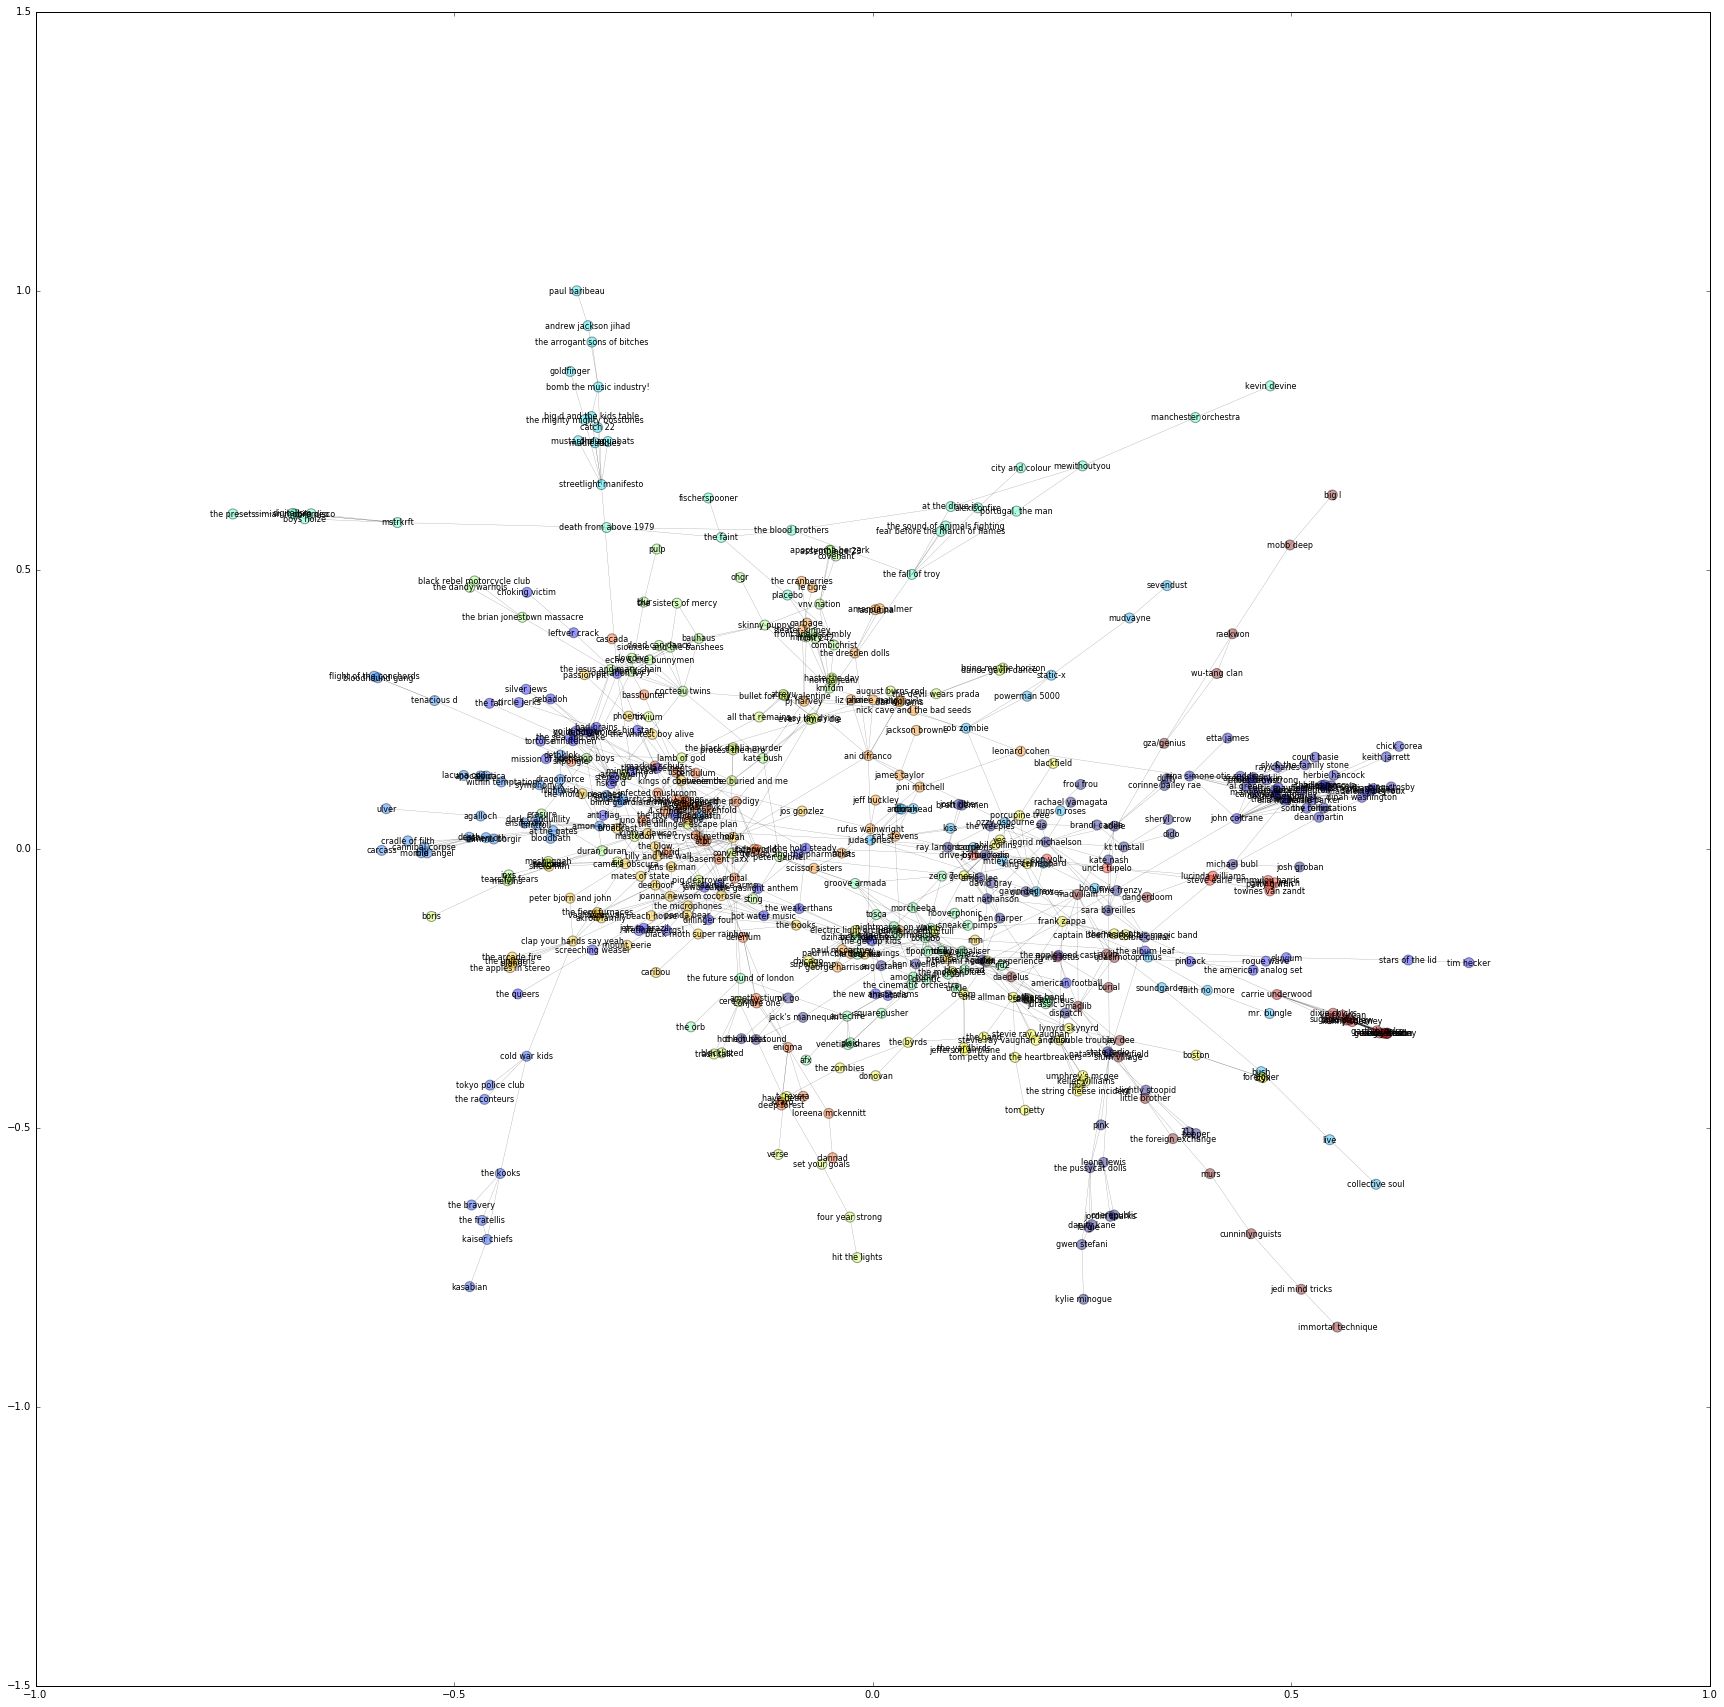

In [542]:
part = community.best_partition(cur_graph)
values = [part.get(node) for node in cur_graph.nodes()]
plt.figure(figsize=(30,30))
nx.draw_networkx(cur_graph, cmap = plt.get_cmap('jet'), node_color = values, node_size=100, width=0.3,font_size = 8,font_weight = 500, with_labels=True, alpha=0.4)
plt.show()

In [541]:
cur_graph = G

if not nx.is_connected(cur_graph):
    # get a list of unconnected networks
    sub_graphs = nx.connected_component_subgraphs(cur_graph)

    main_graph = list(sub_graphs)[0]

    # find the largest network in that list
    for sg in sub_graphs:
        if len(sg.nodes()) > len(main_graph.nodes()):
            main_graph = sg

    cur_graph = main_graph

In [306]:
seperate = new_dict[8] + new_dict[7]

In [386]:
df = df.ix[ (~df['artist1'].isin(new_dict[6])) & (~df['artist2'].isin(new_dict[6])), :]

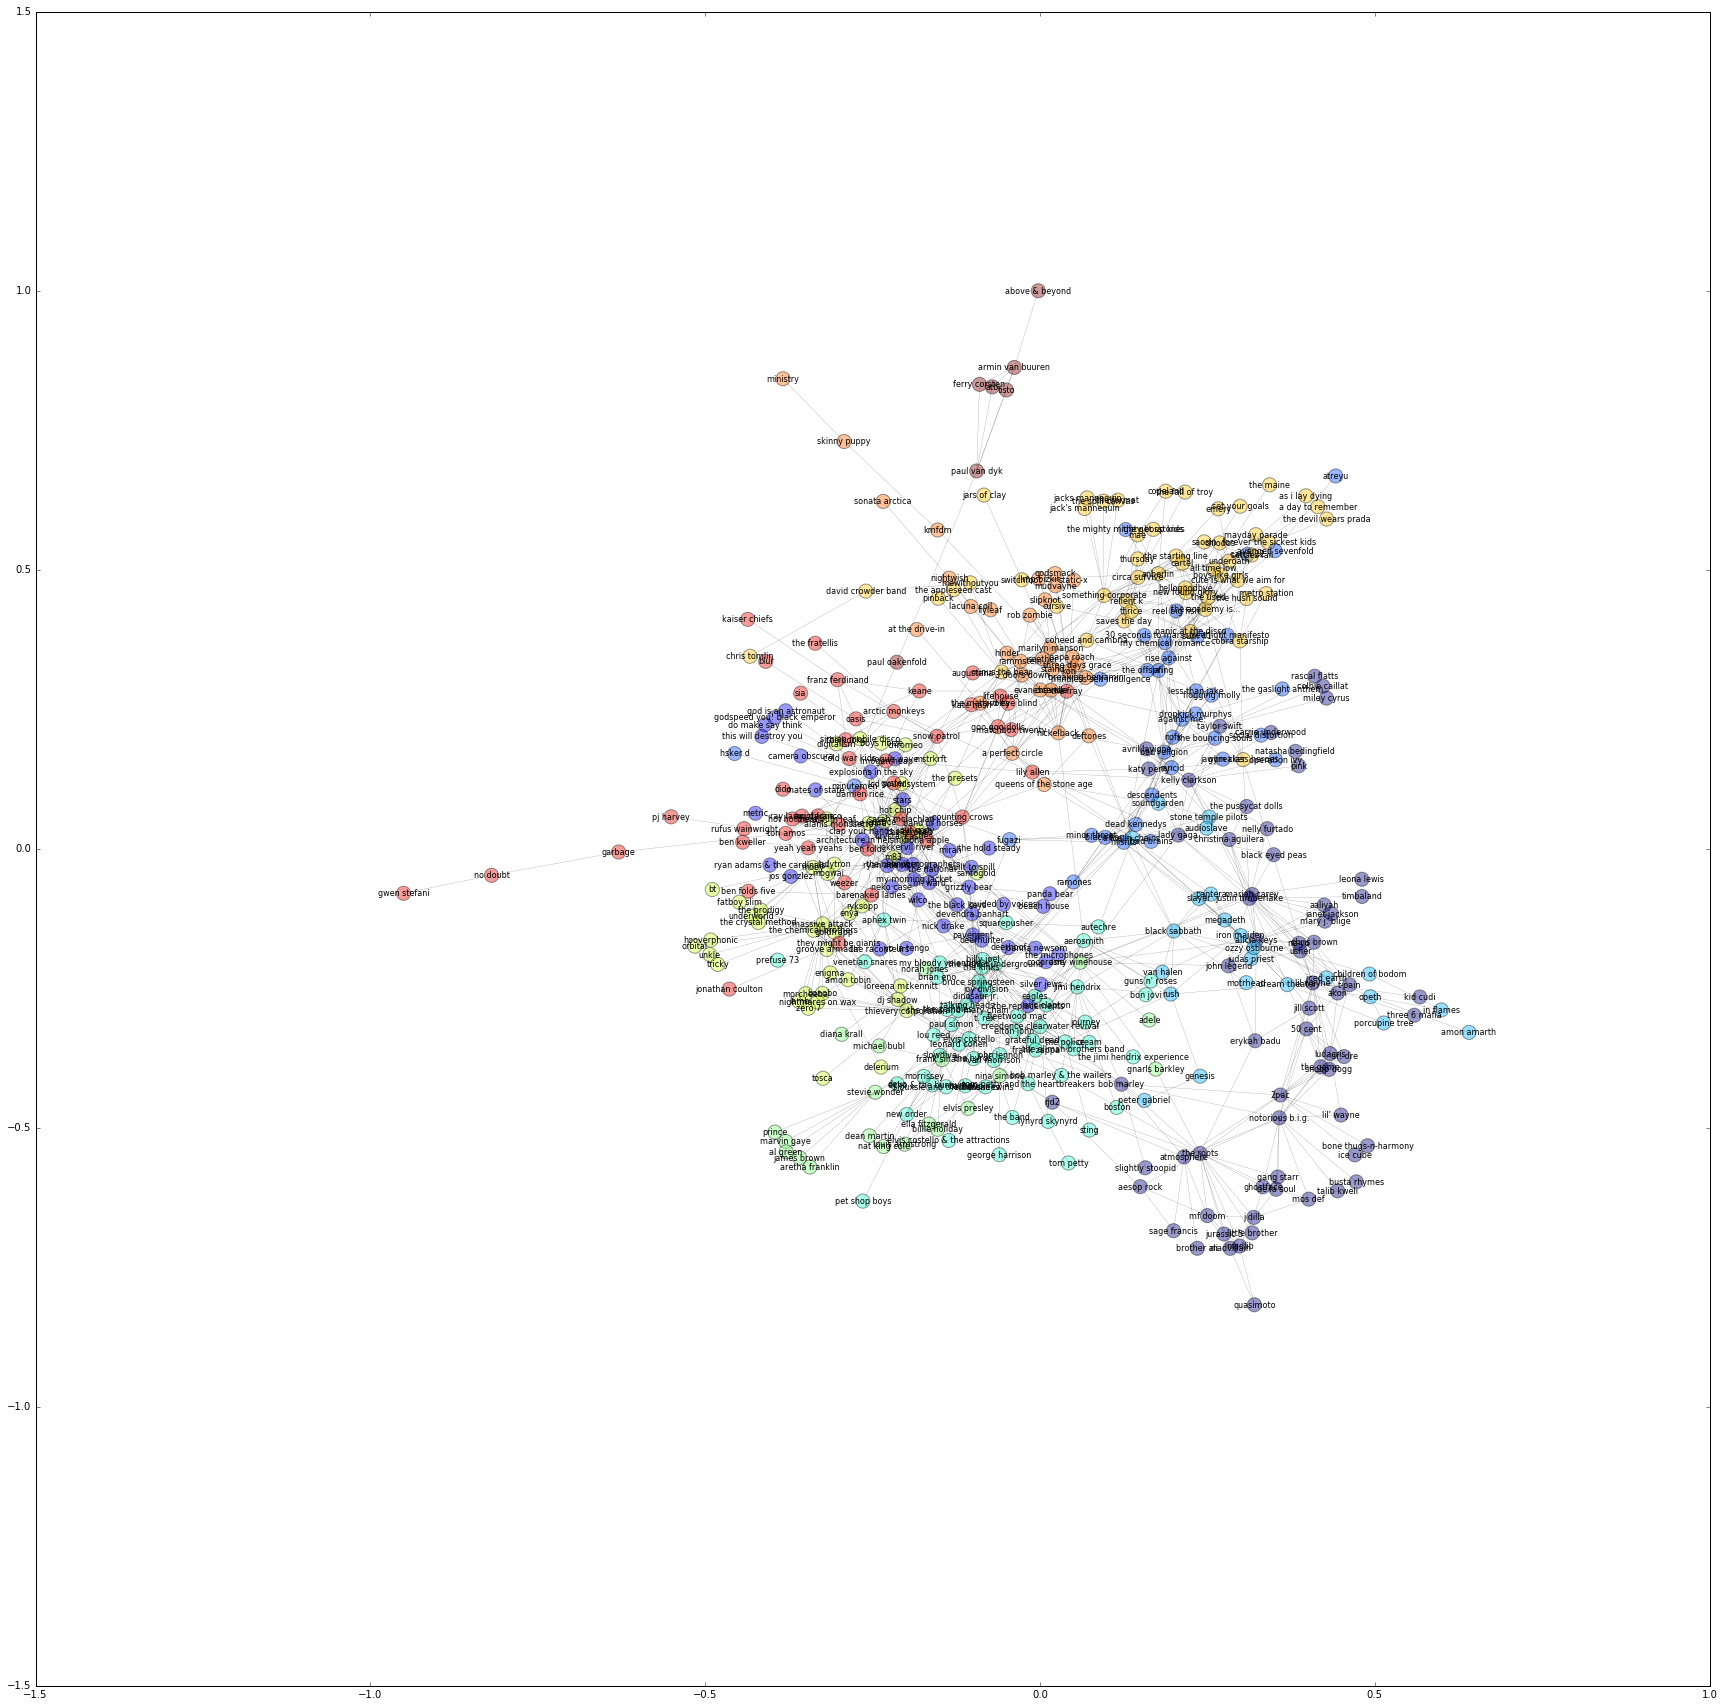

In [420]:
plt.figure(figsize=(30,30))
nx.draw_networkx(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=200, width=0.3,font_size = 8,font_weight = 500, with_labels=True, alpha=0.4)
plt.show()

In [549]:
dc = nx.degree_centrality(cur_graph)

In [550]:
df_dc = pd.DataFrame(dc.values(), index = dc.keys())

In [561]:
df_dc.sort(0, ascending = False).head()

,0
bonobo,0.035294
john coltrane,0.027451
amon amarth,0.027451
bt,0.027451
jawbreaker,0.025490


In [547]:
bc = nx.betweenness_centrality(cur_graph, weight = 'weight')
df_bc = pd.DataFrame(bc.values(), index = bc.keys())

In [562]:
df_bc.sort(0, ascending=False).head()

,0
ani difranco,0.224523
cocteau twins,0.219531
kmfdm,0.198112
judas priest,0.169814
ingrid michaelson,0.168504


In [564]:
# ec = nx.current_flow_betweenness_centrality(G)
# df_ec = pd.DataFrame(ec.values(), index = ec.keys())
# df_ec.sort(0, ascending=False).head()

In [565]:
# ec = nx.eigenvector_centrality(G, weight = 'weight')
# df_ec = pd.DataFrame(ec.values(), index = ec.keys())

In [566]:
df_ec.sort(0, ascending=False).head()

,0
amy winehouse,0.116948
aphex twin,0.113920
misfits,0.104425
afi,0.098937
snow patrol,0.094606


In [557]:
bmc = [x[0] for x in Counter(bc).most_common(50)]
dmc = [x[0] for x in Counter(dc).most_common(20)]
emc = [x[0] for x in Counter(ec).most_common(25)]

In [558]:
def difference(c1,c2):
    union = list(set(c1) & set(c2))
    intersect = list(set(c1) | set(c2))
    return len(union) / float(len(intersect))

In [559]:
difference(bmc, dmc)

0.25

In [568]:
#list(set(bmc) - set(dmc))

In [434]:
df_bc.ix[df_bc.index.str.contains("stevie"),:]

,0
stevie wonder,0.023517


In [31]:
df.ix[(df.artist1 == '2pac') & (df.artist1 == '2pac') ,:]

,count,artist1,artist2
0,556,2pac,eminem
1,590,2pac,nas
2,533,2pac,notorious b.i.g.


In [543]:
df.ix[(df.artist1.str.contains("above")),:]

,count,artist1,artist2
501,168,above & beyond,armin van buuren
502,229,above & beyond,ferry corsten
503,238,above & beyond,paul van dyk
504,238,above & beyond,tisto
